### Use SVC image classifier for multiple categories

In [15]:
import numpy as np
from skimage.transform import resize 
from skimage.io import imread 
import matplotlib.pyplot as plt 
import joblib

In [40]:
## Parameters

use_cifar10_images = False
datadir = 'images/validation/'
model_name = 'models/svc_classifier_cifar10.pkl' if use_cifar10_images else 'models/svc_classifier_custom.pkl'

categories = ['airplane','automobile'] 
categories_codes = [0,1]
img_size = 32 # 150

model = joblib.load(model_name)

In [37]:
def load_cifar10_dataset():
    from keras.datasets import cifar10
    (trainX, trainy), (testX, testy) = cifar10.load_data()
    subset_testX = testX[np.isin(testy, [0,1]).flatten()]
    subset_testy = testy[np.isin(testy, [0,1]).flatten()]
    # Shuffle images
    idx = np.arange(len(subset_testX))
    np.random.shuffle(idx)
    # get first 1% of data
    subset_testX = subset_testX[:int(.01*len(idx))]
    subset_testy = subset_testy[:int(.01*len(idx))]

    return subset_testX

if use_cifar10_images: 
    images = load_cifar10_dataset()

In [38]:
def plot_img(img):
    plt.subplots(figsize=(2, 2))
    plt.imshow(img) 
    plt.show(block=False)
    plt.pause(3)
    plt.close()
    
def get_img(image_number,image_category='automobile'):

    if use_cifar10_images: 
        img=images[image_number]
        plot_img(img)
        
    if not use_cifar10_images:
        path=f'{datadir}/{image_category}{image_number}.jpg'
        img=imread(path) 
        plot_img(img)
        img=resize(img,(img_size,img_size,3)) 

    return img

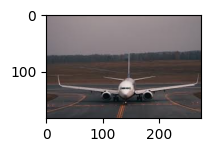

airplane = 35.9880101162947%
automobile = 64.0119898837053%
The predicted image is : automobile


In [51]:
image_number = 9
image_category='valid' # only for custom images

img = get_img(image_number,image_category)
l=[img.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(categories): 
	print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[model.predict(l)[0]])